In [31]:
import json
from scipy import sparse as sp
from sklearn import cluster
import sklearn
import matplotlib.pyplot as plt
import numpy as np

In [2]:
with open('./deepwalk_results/filtered_nodes/parsed_embedding_filtered.json') as f:
    embeddings = json.load(f)

In [21]:
# distortions = []
K = range(3500, 5001, 500)
for k in K:
    kmeanModel = sklearn.cluster.KMeans(k).fit(embeddings)
    distortions.append(kmeanModel.inertia_)

/home/ayakovyna/miniconda3/envs/deepwalk/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/ayakovyna/miniconda3/envs/deepwalk/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/ayakovyna/miniconda3/envs/deepwalk/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/ayakovyna/miniconda3/envs/deepwalk/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1

In [23]:
# kmeanModel = sklearn.cluster.KMeans(2500).fit(embeddings)
# distortions.append(kmeanModel.inertia_)
K = range(500, 5001, 500)

In [25]:
new_K = range(50, 450, 100)
new_distortions = []
for k in new_K:
    kmeanModel = sklearn.cluster.KMeans(k).fit(embeddings)
    new_distortions.append(kmeanModel.inertia_)

/home/ayakovyna/miniconda3/envs/deepwalk/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/ayakovyna/miniconda3/envs/deepwalk/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/ayakovyna/miniconda3/envs/deepwalk/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/ayakovyna/miniconda3/envs/deepwalk/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1

In [26]:
K = [*new_K, *K]
dist = [*new_distortions, *distortions]

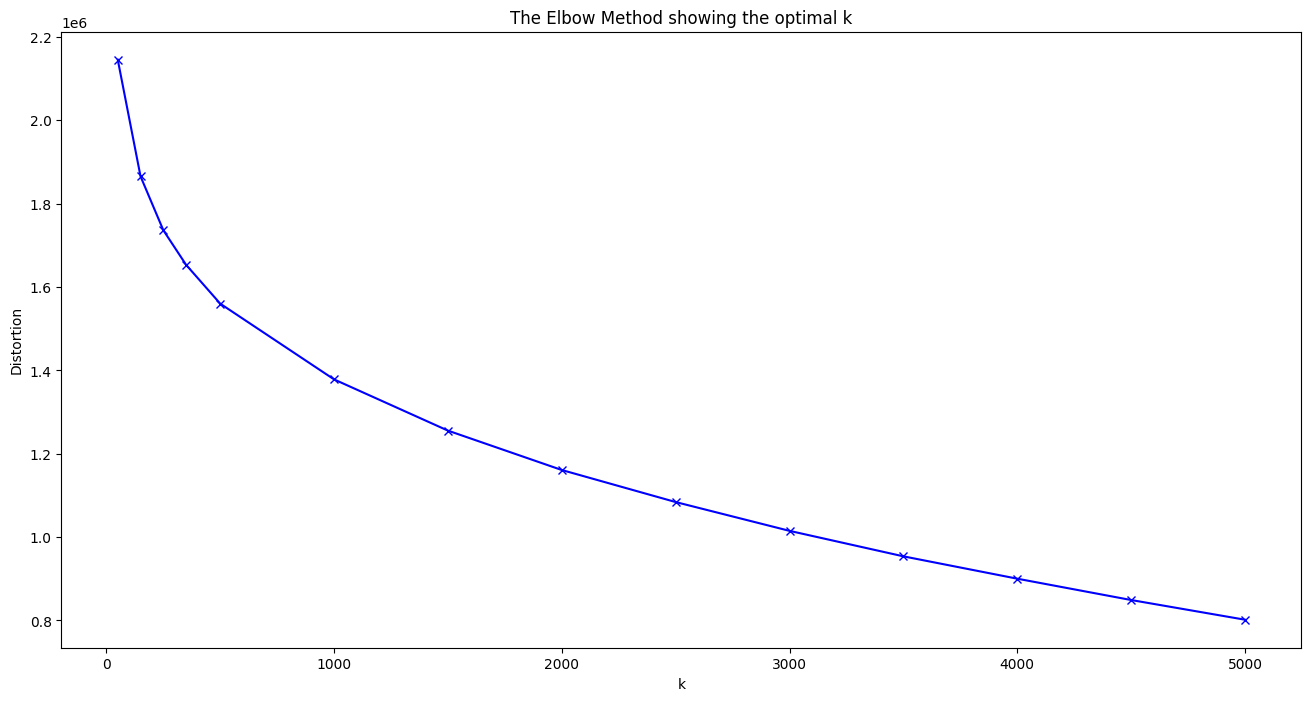

In [27]:
plt.figure(figsize=(16,8))
plt.plot(K, dist, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [28]:
kmeanModel = sklearn.cluster.KMeans(3500).fit(embeddings)

/home/ayakovyna/miniconda3/envs/deepwalk/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [34]:
node_cluster_assignment, counts = np.unique(kmeanModel.predict(embeddings), return_counts=True)

In [40]:
lower_counts = counts[counts > 10]
upper_counts = lower_counts[lower_counts <= 100]

In [44]:
print('Number of Sybils (cluster): ', len(upper_counts))
print('Mean of nodes in the cluster: ', upper_counts.mean(), 'Median: ', np.median(upper_counts))

Number of Sybils (cluster):  383
Mean of nodes in the cluster:  15.87467362924282 Median:  13.0
